In [18]:
import pandas as pd
import yfinance as yf
import numpy as np

In [23]:
df=yf.download('AAPL',start='2020-01-01')
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-31,72.482498,73.419998,72.379997,73.412498,71.920586,100805600
2020-01-02,74.059998,75.150002,73.797501,75.087502,73.561531,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.846367,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,73.426811,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,73.081512,108872000
...,...,...,...,...,...,...
2022-12-08,142.360001,143.520004,141.100006,142.649994,142.649994,62128300
2022-12-09,142.339996,145.570007,140.899994,142.160004,142.160004,76069500
2022-12-12,142.699997,144.500000,141.059998,144.490005,144.490005,70462700


In [24]:
def strategy(df,window=1):
    df=df.copy()
    df['ret']=np.log(df.Close.pct_change()+1)
    df['prior_n']=df.ret.rolling(window).sum()
    df.dropna(inplace=True)
    df['position']=[1 if i>0 else -1 for i in df.prior_n]
    df['start']=df.position.shift(1)*df.ret
    return np.exp(df[['ret','start']].cumsum()).plot(figsize=(12,6))

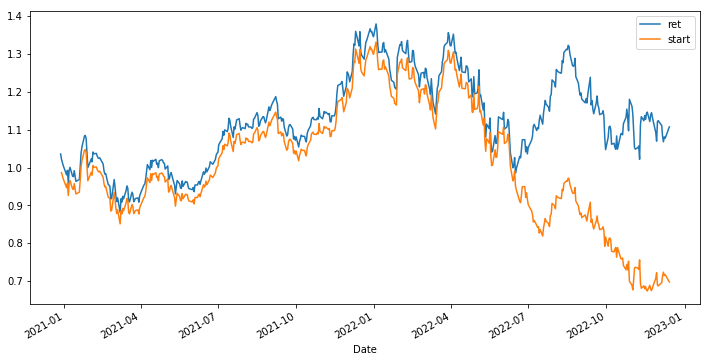

In [29]:
strategy(df,250)